In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook

# plt.style.use('tableau-colorblind10')
plt.style.use('seaborn-colorblind')
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
markers = ['x', 'o', 'd', '^', 's', 'X', 'P', 'D']
# Set the default text font size
plt.rc('font', size=16)# Set the axes title font size
plt.rc('axes', titlesize=16)# Set the axes labels font size
plt.rc('axes', labelsize=16)# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)# Set the legend font size
plt.rc('legend', fontsize=11)# Set the font size of the figure title
plt.rc('figure', titlesize=20)

/home/putchas/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Bivariate Gaussian plots

In [2]:
#load in data
dat = pd.read_csv("out/toy_bvg_gradient_comp.csv")
dat = dat.clip(lower = 0)
dat = np.array(dat)
methods = ['SGLD (WR)', 'SGLD (WOR)', 'SGLD-PS (Exact)', 'SGLD-PS (Approx)']

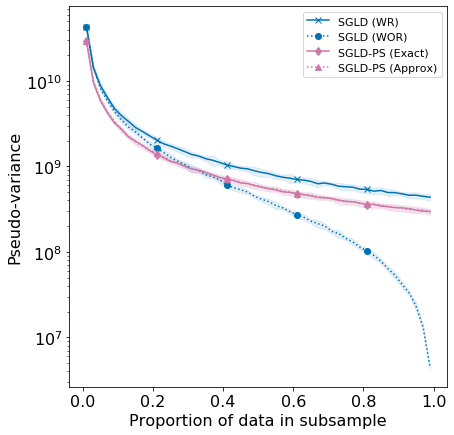

In [3]:
#plot sgld methods only
method_idx = [0, 1, 2,3]
lines = ["-","dotted"]*2
col_idx = [0, 0, 3,3]

fig, ax = plt.subplots(figsize = (7,7))
plt.gcf().subplots_adjust(left = 0.15)
for i in method_idx:
    ax.plot(dat[:,12], dat[:, i*3], linewidth = 1.5, label = methods[i], linestyle = lines[i], c = colors[col_idx[i]], marker = markers[i], markevery = 10)
    ax.fill_between(dat[:,12], dat[:, 3*i+1], dat[:, 3*i+2], color = colors[col_idx[i]],  alpha = .1)
plt.yscale("log")
plt.xlabel("Proportion of data in subsample")
plt.ylabel("Pseudo-variance")
plt.legend()
plt.savefig("./fig/toy_bvg_grad_comp_sgld.pdf")
plt.show()

### Logistic Regression (balanced) plots

In [4]:
#load in data
dat2 = pd.read_csv("out/toy_lrb_gradient_comp.csv")
dat2 = dat2.clip(lower = 0)
methods = ['SGLD (WR)', 'SGLD (WOR)', 'SGLD-PS (Exact)', 'SGLD-PS (Approx)', 'SGLD-CV (WR)', 'SGLD-CV (WOR)','SGLD-CV-PS (Exact)', 'SGLD-CV-PS (Approx)']

In [5]:
dat2 = np.array(dat2)

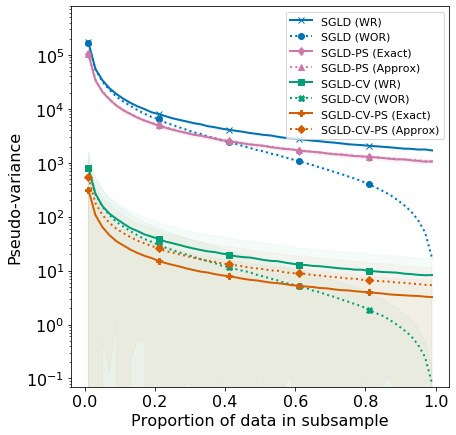

In [6]:
#plot all methods
lines = ["-","dotted"]*4
col_idx = [0, 0, 3,3, 1,1,2,2]

fig, ax = plt.subplots(figsize = (7,7))
plt.gcf().subplots_adjust(left = 0.15)
for i in range(len(methods)):
    ax.plot(dat2[:,24], dat2[:, i*3], linewidth = 2, label = methods[i], linestyle = lines[i], c = colors[col_idx[i]], marker = markers[i], markevery = 10)
    ax.fill_between(dat2[:,24], dat2[:, 3*i+1], dat2[:, 3*i+2], color = colors[col_idx[i]], alpha = .04)

plt.yscale("log")
plt.xlabel("Proportion of data in subsample")
plt.ylabel("Pseudo-variance")
plt.ylim((7*10**-2, 8*10**5))
plt.legend(loc = 'upper right')
plt.savefig("./fig/toy_lrb_grad_comp_all.pdf")
plt.show()


### Logistic regression imbalanced

In [7]:
#load in data
dat3 = pd.read_csv("out/toy_lrib_gradient_comp.csv")
dat3 = dat3.clip(lower=0)
methods = ['SGLD (WR)', 'SGLD (WOR)', 'SGLD-PS (Exact)', 'SGLD-PS (Approx)', 'SGLD-CV (WR)', 'SGLD-CV (WOR)','SGLD-CV-PS (Exact)', 'SGLD-CV-PS (Approx)']

In [8]:
dat3 = np.array(dat3)

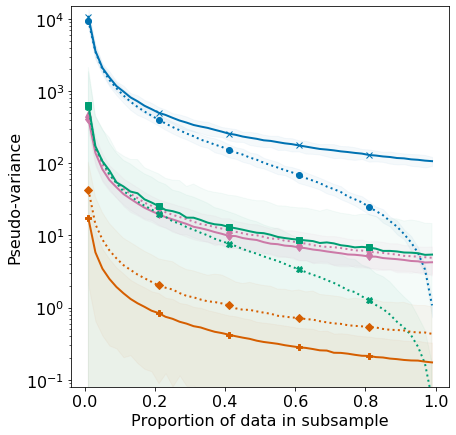

In [9]:
#plot all methods
lines = ["-","dotted"]*4
col_idx = [0, 0, 3,3, 1,1,2,2]
fig, ax = plt.subplots(figsize = (7,7))
plt.gcf().subplots_adjust(left = 0.15)
for i in range(len(methods)):
    ax.plot(dat3[:,24], dat3[:, i*3], linewidth = 2, label = methods[i], linestyle = lines[i], c = colors[col_idx[i]], marker = markers[i], markevery = 10)
    ax.fill_between(dat3[:,24], dat3[:, 3*i+1], dat3[:, 3*i+2], color = colors[col_idx[i]], alpha= .04)

plt.yscale("log")
plt.xlabel("Proportion of data in subsample")
plt.ylabel("Pseudo-variance")
plt.ylim((8*10**(-2), 1.5*10**4))
plt.legend("", frameon = False)
plt.savefig("./fig/toy_lrib_grad_comp_all.pdf")
plt.show()